In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random

TRAINDIR = 'faces/train' # directory where we store our data
IMG_Y_SIZE = 112
IMG_X_SIZE = 92
NUM_NAMES = 40
names = os.listdir(TRAINDIR) # list of classes i.e. names

def show_img(im): # defines a function to output the image
    plt.imshow(im, cmap='gray') # take an array of 0-255 brightness values for each pixel in the image, and create a viewable object 
    plt.show() # display the image in the output
    
def show_img_label(im, label): # defines a function to print a label, then output an image
    print(label)
    show_img(im)

# check out VGG or '
# 1. input face image and get a vector representation (features)
# GAN model inversion

In [2]:
# load the training data


training_data = []

def create_training_data():
    for name in names:
        name_num = names.index(name)
        for img in os.listdir(f"{TRAINDIR}/{name}"):
            img_array = cv2.imread(f"{TRAINDIR}/{name}/{img}",cv2.IMREAD_GRAYSCALE) # convert the image to its pixel (brightness value) data
            new_array = cv2.resize(img_array,(IMG_X_SIZE,IMG_Y_SIZE)) # resize if need be
            training_data.append([new_array, name_num]) # add it to training_data along with its name

create_training_data()

random.shuffle(training_data) # randomize the training data (make learning more effective)
    

In [3]:
# prepare the training data for ML i.e. convert to numpy

X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1,IMG_X_SIZE,IMG_Y_SIZE,1)
y = np.array(y)

print(X.shape, y.shape)

(360, 92, 112, 1) (360,)


In [4]:
import pickle

# save your data (so you don't have to load it every time)

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [5]:
TESTDIR = 'faces/test' # directory where we store our testing data

# load the testing data


testing_data = []

def create_testing_data():
    for name in names:
        name_num = names.index(name)
        for img in os.listdir(f"{TESTDIR}/{name}"):
            img_array = cv2.imread(f"{TESTDIR}/{name}/{img}",cv2.IMREAD_GRAYSCALE) # convert the image to its pixel (brightness value) data
            new_array = cv2.resize(img_array,(IMG_X_SIZE,IMG_Y_SIZE)) # resize if need be
            testing_data.append([new_array, name_num]) # add it to testing_data along with its name

create_testing_data()


In [6]:
XT = []
yt = []

for features, label in testing_data:
    XT.append(features)
    yt.append(label)
    

XT = np.array(XT).reshape(-1,IMG_X_SIZE,IMG_Y_SIZE,1)
yt = np.array(yt)
print(XT.shape, yt.shape)

(40, 92, 112, 1) (40,)


In [7]:
# save your data (so you don't have to load it every time)

pickle_out = open("XT.pickle","wb")
pickle.dump(XT, pickle_out)
pickle_out.close()


pickle_out = open("yt.pickle","wb")
pickle.dump(yt, pickle_out)
pickle_out.close()



In [8]:
import tensorflow as tf
#GPU test and settings
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
#tf.debugging.set_log_device_placement(True)
#gpu_optoins = tf.GPUOptions(per_process_gpu_memory_fraction=0.3333)
#sess=tf.Session(config=tf.ConfigProto(gpu_options=gpuoptions))

Num GPUs Available:  1


In [14]:
import pickle
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle","rb"))
XT = pickle.load(open("XT.pickle", "rb"))
yt = pickle.load(open("yt.pickle","rb"))
X = X/255.0
XT = XT/255.0

train_ds = tf.data.Dataset.from_tensor_slices(
    (X, y)).shuffle(10000).batch(10)

test_ds = tf.data.Dataset.from_tensor_slices((XT, yt)).batch(10)

In [28]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.python.keras.callbacks import TensorBoard
import time
import pickle

# tensorflow is the most popular supported framework by all MLaaS service providers

X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle","rb"))
X = X/255.0

print(X.shape,y.shape)

NAME = "Face-Recognition-CNN-{}".format(int(time.time()))

tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

model= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= (IMG_X_SIZE,IMG_Y_SIZE, 1)),
    Flatten(),
    Dense(NUM_NAMES, activation='softmax')  
])

model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])




(360, 92, 112, 1) (360,)


In [31]:
# get a summary of the model
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 86, 106, 36)       1800      
_________________________________________________________________
flatten_3 (Flatten)          (None, 328176)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 40)                13127080  
Total params: 13,128,880
Trainable params: 13,128,880
Non-trainable params: 0
_________________________________________________________________


In [30]:
# train the model
model.fit(X, y, batch_size=40,epochs=20, callbacks = [tensorboard])

# to view tensorboard, go to terminal, cd to sarahs-inversion and type
# tensorboard --logdir='logs/'

Epoch 1/20
9/9 [==============================] - 1s 19ms/step - loss: 10.0475 - accuracy: 0.1111
Epoch 2/20
9/9 [==============================] - 0s 12ms/step - loss: 1.7308 - accuracy: 0.7083
Epoch 3/20
9/9 [==============================] - 0s 12ms/step - loss: 0.3233 - accuracy: 0.9389
Epoch 4/20
9/9 [==============================] - 0s 12ms/step - loss: 0.0792 - accuracy: 0.9861
Epoch 5/20
9/9 [==============================] - 0s 12ms/step - loss: 0.0219 - accuracy: 0.9972
Epoch 6/20
9/9 [==============================] - 0s 12ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 7/20
9/9 [==============================] - 0s 12ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 8/20
9/9 [==============================] - 0s 12ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 9/20
9/9 [==============================] - 0s 11ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 10/20
9/9 [==============================] - 0s 12ms/step - loss: 8.6211e-04 - accuracy: 1.0000
Epoch 11/20
9/9 [=======

Decoding:  s2
Goal Image:


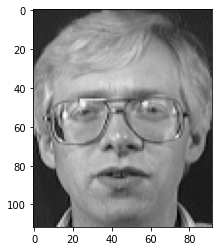

(92, 112, 1)
Starting Image:


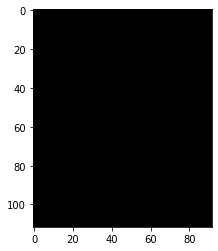

tf.Tensor(
[[0.01311975 0.01033535 0.00773932 0.0049817  0.00536513 0.00499143
  0.0107381  0.00410995 0.0054456  0.0134601  0.00056127 0.00530403
  0.03860438 0.02017195 0.01395702 0.00925792 0.01560045 0.01077713
  0.00348327 0.00414769 0.03224462 0.03339115 0.00649479 0.01829879
  0.16713911 0.03841927 0.18728836 0.03474373 0.07646973 0.00811828
  0.0284466  0.00197132 0.10465195 0.00484632 0.01064263 0.02580186
  0.00507295 0.01029126 0.00162113 0.00189458]], shape=(1, 40), dtype=float32)
Current Loss: 5.2392883
Updated Image:


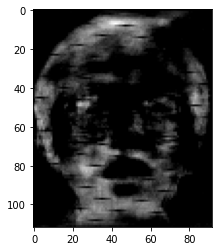

Noise:


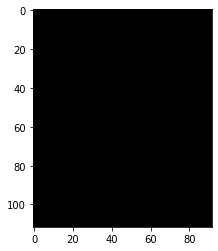

(92, 112, 1)
Starting Image:


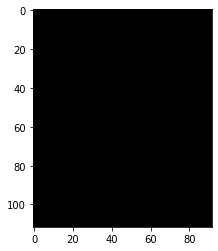

tf.Tensor(
[[0.01311975 0.01033535 0.00773932 0.0049817  0.00536513 0.00499143
  0.0107381  0.00410995 0.0054456  0.0134601  0.00056127 0.00530403
  0.03860438 0.02017195 0.01395702 0.00925792 0.01560045 0.01077713
  0.00348327 0.00414769 0.03224462 0.03339115 0.00649479 0.01829879
  0.16713911 0.03841927 0.18728836 0.03474373 0.07646973 0.00811828
  0.0284466  0.00197132 0.10465195 0.00484632 0.01064263 0.02580186
  0.00507295 0.01029126 0.00162113 0.00189458]], shape=(1, 40), dtype=float32)
Current Loss: 5.2392883
Updated Image:


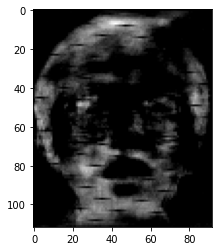

Noise:


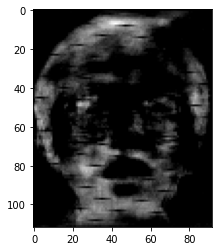

(92, 112, 1)
Starting Image:


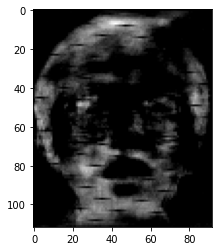

tf.Tensor(
[[1.21558315e-36 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.87342237e-32 0.00000000e+00 1.53309583e-25 0.00000000e+00
  0.00000000e+00 5.08468530e-25 0.00000000e+00 0.00000000e+00
  5.16640925e-34 1.92350164e-36 0.00000000e+00 8.07725521e-31
  0.00000000e+00 6.11858836e-37 2.12795371e-13 0.00000000e+00
  6.14183584e-21 3.26674018e-26 0.00000000e+00 1.12153788e-26
  8.54650011e-07 9.99998450e-01 4.38357617e-09 2.24842271e-22
  6.89228955e-07 0.00000000e+00 4.04735333e-28 0.00000000e+00
  2.63003803e-36 4.40179141e-31 0.00000000e+00 1.61676872e-14
  9.13979314e-14 0.00000000e+00 0.00000000e+00 0.00000000e+00]], shape=(1, 40), dtype=float32)
Current Loss: 95.41404
Updated Image:


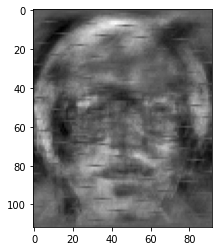

Noise:


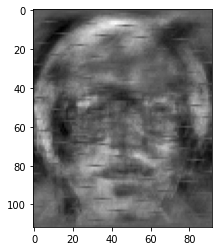

(92, 112, 1)
Starting Image:


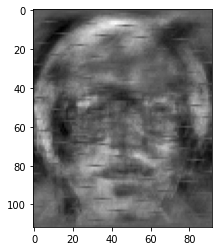

tf.Tensor(
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.13170704e-35 0.00000000e+00
  0.00000000e+00 6.71566638e-35 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 3.06417994e-18 0.00000000e+00
  3.72921186e-29 1.10502254e-36 0.00000000e+00 2.31642977e-37
  2.49709964e-09 1.00000000e+00 1.32059890e-12 2.93507233e-31
  2.16713536e-09 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 4.40126907e-20
  6.06548227e-19 0.00000000e+00 0.00000000e+00 0.00000000e+00]], shape=(1, 40), dtype=float32)
Current Loss: 134.08246
Updated Image:


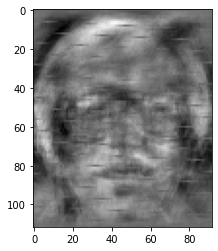

Noise:


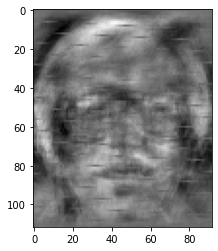

(92, 112, 1)
Starting Image:


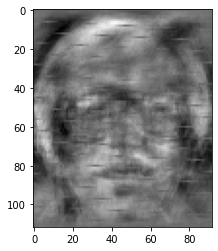

tf.Tensor(
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.5016586e-23 0.0000000e+00
  3.7366139e-38 0.0000000e+00 0.0000000e+00 0.0000000e+00 4.1466305e-12
  1.0000000e+00 1.7985801e-16 0.0000000e+00 3.8283413e-12 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  3.5221025e-26 1.3110939e-24 0.0000000e+00 0.0000000e+00 0.0000000e+00]], shape=(1, 40), dtype=float32)
Current Loss: 176.42255
Updated Image:


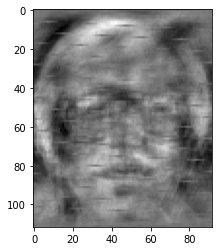

Noise:


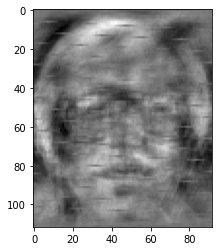

(92, 112, 1)
Starting Image:


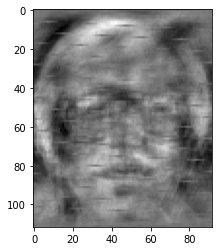

tf.Tensor(
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 2.4115811e-24 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.6023319e-12
  1.0000000e+00 5.1854358e-17 0.0000000e+00 1.7593877e-12 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  3.7900526e-27 1.4174837e-25 0.0000000e+00 0.0000000e+00 0.0000000e+00]], shape=(1, 40), dtype=float32)
Current Loss: 183.34508
Updated Image:


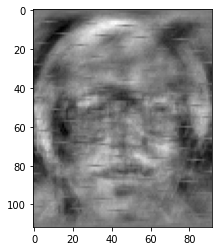

Noise:


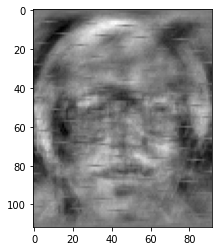

(92, 112, 1)
Starting Image:


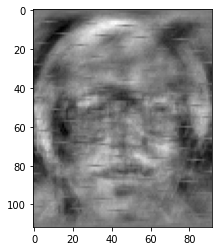

tf.Tensor(
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0150913e-26 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 9.1802718e-14
  1.0000000e+00 1.0228072e-18 0.0000000e+00 1.1529407e-13 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  6.5190780e-30 3.4639244e-28 0.0000000e+00 0.0000000e+00 0.0000000e+00]], shape=(1, 40), dtype=float32)
Current Loss: 202.6726
Updated Image:


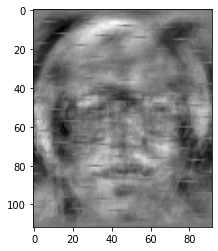

Noise:


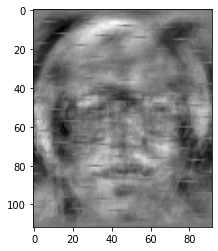

(92, 112, 1)
Starting Image:


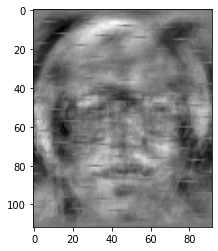

tf.Tensor(
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.5332186e-28 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0275804e-14
  1.0000000e+00 5.1703968e-20 0.0000000e+00 1.4963987e-14 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  4.7865510e-32 3.1996215e-30 0.0000000e+00 0.0000000e+00 0.0000000e+00]], shape=(1, 40), dtype=float32)
Current Loss: 217.64746
Updated Image:


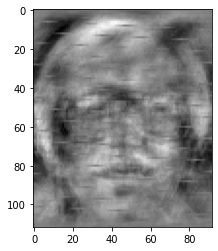

Noise:


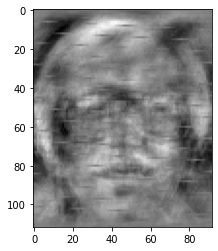

(92, 112, 1)
Starting Image:


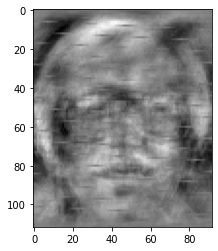

tf.Tensor(
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 8.0548420e-37 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 4.7367945e-19
  1.0000000e+00 4.5756392e-26 0.0000000e+00 6.8189807e-19 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]], shape=(1, 40), dtype=float32)
Current Loss: 283.2815
Updated Image:


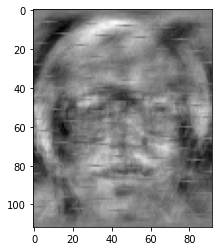

Noise:


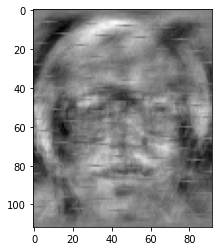

(92, 112, 1)
Starting Image:


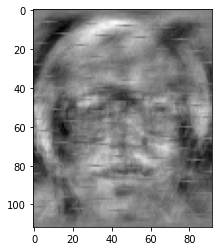

tf.Tensor(
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 7.7104793e-21
  1.0000000e+00 1.5400181e-28 0.0000000e+00 1.2371047e-20 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]], shape=(1, 40), dtype=float32)
Current Loss: 310.78735
Updated Image:


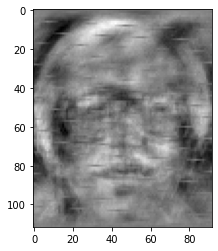

Noise:


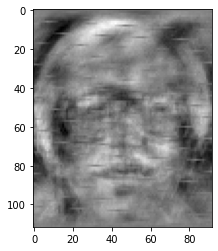

In [32]:
import tensorflow as tf
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


def sarahsinversion(model, img, learning_rate, label, best_loss, best_img, counter):
    print(img[0].shape)
    show_img_label(tf.reshape(img[0], (IMG_Y_SIZE, IMG_X_SIZE)), "Starting Image:")
    with tf.GradientTape() as tape:
        tape.watch(img)
        prediction = model(img, training=False) # run img through the model
        print(prediction)
        loss = loss_object(label, prediction) # calculate the loss of img
    gradient = tape.gradient(loss, img) # calculate the gradient with respect two each pixel in img
    print("Current Loss:", loss.numpy())
    
    img = tf.clip_by_value(img - learning_rate*gradient, 0, 255)
    show_img_label(tf.reshape(img[0], (IMG_Y_SIZE, IMG_X_SIZE)), "Updated Image:")
    

    
    
    img = np.array([np.clip(x+np.random.normal(2,2), 0, 255) for x in img.numpy()])
    show_img_label(tf.reshape(img[0], (IMG_Y_SIZE, IMG_X_SIZE)), "Noise:")
    img = tf.convert_to_tensor(img)
    return img


black_image_tensor = tf.convert_to_tensor(np.zeros((1,IMG_X_SIZE,IMG_Y_SIZE,1)))

for name_index in range(len(names)):
    if names[name_index] == "s2":
        print("Decoding: ", names[name_index])
        show_img_label(tf.reshape(XT[name_index], (IMG_Y_SIZE, IMG_X_SIZE)), "Goal Image:")
        best_img = black_image_tensor
        best_loss = float('inf')
        for i in range(10):
            best_img = sarahsinversion(model, best_img, 0.1, name_index, best_img, best_loss, i)
        break


